In [71]:
import os
import json
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [72]:
os.getcwd()

'/Users/peaceforlives/Documents/Projects/cyberbullying/jupyter'

In [73]:
# ROOT = 'C:\\Users\\niti.mishra\\Documents\\Personal\\cyberbullying\\'
ROOT = '/Users/peaceforlives/Documents/Projects/cyberbullying/'
RESULTS = Path(os.path.join(ROOT, 'results'))
# RESULTS = Path(os.path.join(ROOT, 'results', '1g2g'))
PLOTS = Path(os.path.join(RESULTS))
files = [i for i in list(RESULTS.iterdir()) if '.json' in i.suffix ]
# files = [files[0]]
files.sort()
files

[PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results1000.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results1500.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results2000.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results2500.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results3000.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results3500.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results4000.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results4500.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results500.json'),
 PosixPath('/Users/peaceforlives/Documents/Projects/cyberbullying/results/TRACE_results5000.json'),
 

In [74]:
full_df = pd.DataFrame()
for i in files:
#     print(i)
    each_df = pd.read_json(i, lines=True)
    each_df['iter'] =  re.findall(r'\d+', i.stem)[0]
    each_df['iter'] = each_df['iter'].astype(int)
    full_df = full_df.append(each_df)

full_df.head()

,model,name,size,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression (TruncatedSVD),"[[833, 167], [833, 167], [833, 167], [833, 167...","[0.6047904191616761, 0.6646706586826341, 0.724...","[0.655286252891043, 0.656893512245581, 0.70648...","[0.6047904191616761, 0.6646706586826341, 0.724...","[0.552919979306531, 0.6277784855820271, 0.6973...","[0.815279731524511, 0.8428513273821631, 0.8510...","[1.715577125549316, 1.703397035598754, 1.69099...",1000
1,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression,"[[833, 167], [833, 167], [833, 167], [833, 167...","[0.6826347305389221, 0.658682634730538, 0.6287...","[0.683824018629407, 0.658051951652251, 0.65012...","[0.6826347305389221, 0.658682634730538, 0.6287...","[0.6507449670670401, 0.6237660076365641, 0.591...","[0.8709595935454191, 0.868536992696959, 0.8595...","[0.535477876663208, 0.534779071807861, 0.52747...",1000
2,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier (TruncatedSVD),"[[833, 167], [833, 167], [833, 167], [833, 167...","[0.694610778443113, 0.634730538922155, 0.62874...","[0.6882910678152051, 0.661492293191394, 0.6272...","[0.694610778443113, 0.634730538922155, 0.62874...","[0.690196973533576, 0.595931279603911, 0.60875...","[0.9879839330388781, 0.986768329179837, 0.9891...","[1.71988821029663, 1.7112901210784912, 1.72736...",1000
3,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier,"[[833, 167], [833, 167], [833, 167], [833, 167...","[0.67065868263473, 0.634730538922155, 0.574850...","[0.667184861047136, 0.647231310574726, 0.55986...","[0.67065868263473, 0.634730538922155, 0.574850...","[0.667726604920559, 0.6391808568776031, 0.5658...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.5395131111145021, 0.5283319950103761, 0.549...",1000
4,"Pipeline(memory=None,\n steps=[('norma...",SVC,"[[833, 167], [833, 167], [833, 167], [833, 167...","[0.712574850299401, 0.7005988023952091, 0.6886...","[0.7084013790600611, 0.700879092878073, 0.6725...","[0.712574850299401, 0.7005988023952091, 0.6886...","[0.707828582466403, 0.6873147093980341, 0.6719...","[0.9577864516218051, 0.9505133406573111, 0.954...","[0.9288749694824211, 0.932404994964599, 0.9245...",1000


In [75]:
df = full_df.copy()
df = full_df.drop(['model', 'size'], axis=1)
df.head()

,name,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,LogisticRegression (TruncatedSVD),"[0.6047904191616761, 0.6646706586826341, 0.724...","[0.655286252891043, 0.656893512245581, 0.70648...","[0.6047904191616761, 0.6646706586826341, 0.724...","[0.552919979306531, 0.6277784855820271, 0.6973...","[0.815279731524511, 0.8428513273821631, 0.8510...","[1.715577125549316, 1.703397035598754, 1.69099...",1000
1,LogisticRegression,"[0.6826347305389221, 0.658682634730538, 0.6287...","[0.683824018629407, 0.658051951652251, 0.65012...","[0.6826347305389221, 0.658682634730538, 0.6287...","[0.6507449670670401, 0.6237660076365641, 0.591...","[0.8709595935454191, 0.868536992696959, 0.8595...","[0.535477876663208, 0.534779071807861, 0.52747...",1000
2,SGDClassifier (TruncatedSVD),"[0.694610778443113, 0.634730538922155, 0.62874...","[0.6882910678152051, 0.661492293191394, 0.6272...","[0.694610778443113, 0.634730538922155, 0.62874...","[0.690196973533576, 0.595931279603911, 0.60875...","[0.9879839330388781, 0.986768329179837, 0.9891...","[1.71988821029663, 1.7112901210784912, 1.72736...",1000
3,SGDClassifier,"[0.67065868263473, 0.634730538922155, 0.574850...","[0.667184861047136, 0.647231310574726, 0.55986...","[0.67065868263473, 0.634730538922155, 0.574850...","[0.667726604920559, 0.6391808568776031, 0.5658...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.5395131111145021, 0.5283319950103761, 0.549...",1000
4,SVC,"[0.712574850299401, 0.7005988023952091, 0.6886...","[0.7084013790600611, 0.700879092878073, 0.6725...","[0.712574850299401, 0.7005988023952091, 0.6886...","[0.707828582466403, 0.6873147093980341, 0.6719...","[0.9577864516218051, 0.9505133406573111, 0.954...","[0.9288749694824211, 0.932404994964599, 0.9245...",1000


In [76]:
def avg_series(series):
    return [sum(i)/len(i) for i in series]

df.iloc[:,1:7] = df.iloc[:,1:7].apply(avg_series)
df
# full_df.to_excel("output.xlsx")

,name,accuracy,precision,recall,f1_valid,f1_train,time,iter
0,LogisticRegression (TruncatedSVD),0.668007,0.688631,0.668007,0.626349,0.832206,1.707586,1000
1,LogisticRegression,0.672029,0.684752,0.672029,0.633501,0.869431,0.530802,1000
2,SGDClassifier (TruncatedSVD),0.658995,0.663192,0.658995,0.648441,0.990194,1.713780,1000
3,SGDClassifier,0.629025,0.625777,0.629025,0.625951,1.000000,0.538873,1000
4,SVC,0.682003,0.677891,0.682003,0.670061,0.952773,0.924361,1000
...,...,...,...,...,...,...,...,...
0,LogisticRegression (TruncatedSVD),0.691467,0.685846,0.691467,0.672645,0.720986,9.623698,7500
1,LogisticRegression,0.700533,0.696231,0.700533,0.684235,0.818415,4.460387,7500
2,SGDClassifier (TruncatedSVD),0.692933,0.688870,0.692933,0.677584,0.735898,10.087428,7500
3,SGDClassifier,0.684267,0.678267,0.684267,0.679029,0.933005,4.634571,7500


In [77]:
train = df.groupby(['name', 'iter'])['f1_train'].sum().unstack('name').reset_index()
train = train.loc[:,['NB' not in i for i in train.columns]]
train['set'] = 'train'

valid = df.groupby(['name', 'iter'])['f1_valid'].sum().unstack('name').reset_index()
valid = valid.loc[:,['NB' not in i for i in valid.columns]]
valid['set'] = 'valid'
valid

name,iter,LogisticRegression,LogisticRegression (TruncatedSVD),SGDClassifier,SGDClassifier (TruncatedSVD),SVC,set
0,500,0.577629,0.586567,0.604816,0.589274,0.628634,valid
1,1000,0.633501,0.626349,0.625951,0.648441,0.670061,valid
2,1500,0.631752,0.636775,0.683712,0.678707,0.693744,valid
3,2000,0.635876,0.637089,0.678577,0.691205,0.684974,valid
4,2500,0.677656,0.665152,0.697809,0.711832,0.723960,valid
5,3000,0.682164,0.673850,0.699073,0.729956,0.714548,valid
6,3500,0.673354,0.667288,0.688162,0.716853,0.706080,valid
7,4000,0.680187,0.679011,0.687839,0.706244,0.708926,valid
8,4500,0.674513,0.672499,0.682541,0.689345,0.692647,valid
9,5000,0.679830,0.669630,0.685044,0.695394,0.695084,valid


In [78]:
plot_df = valid.append(train)
plot_df.reset_index(inplace=True)
plot_df.drop('index', axis=1, inplace=True)
plot_df.set_index('iter', inplace=True)
plot_df

name,LogisticRegression,LogisticRegression (TruncatedSVD),SGDClassifier,SGDClassifier (TruncatedSVD),SVC,set
iter,,,,,,
500,0.577629,0.586567,0.604816,0.589274,0.628634,valid
1000,0.633501,0.626349,0.625951,0.648441,0.670061,valid
1500,0.631752,0.636775,0.683712,0.678707,0.693744,valid
2000,0.635876,0.637089,0.678577,0.691205,0.684974,valid
2500,0.677656,0.665152,0.697809,0.711832,0.723960,valid
3000,0.682164,0.673850,0.699073,0.729956,0.714548,valid
3500,0.673354,0.667288,0.688162,0.716853,0.706080,valid
4000,0.680187,0.679011,0.687839,0.706244,0.708926,valid
4500,0.674513,0.672499,0.682541,0.689345,0.692647,valid


set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: LogisticRegression (TruncatedSVD), dtype: object

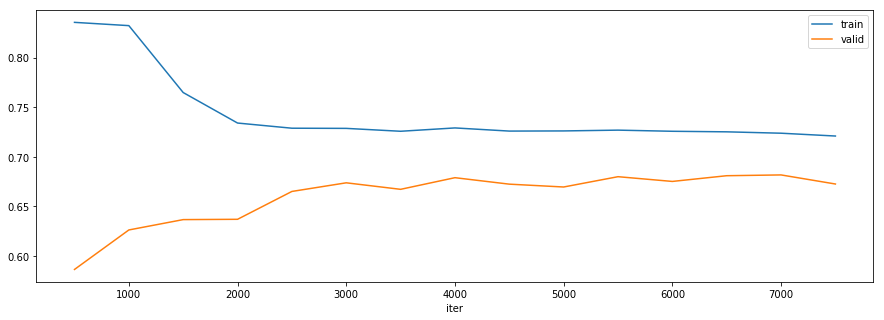

In [79]:
plot_df.groupby('set')['LogisticRegression (TruncatedSVD)'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SGDClassifier (TruncatedSVD), dtype: object

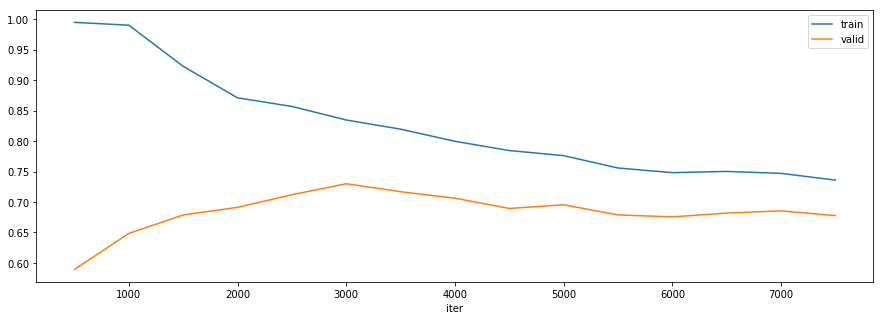

In [80]:
plot_df.groupby('set')['SGDClassifier (TruncatedSVD)'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SVC, dtype: object

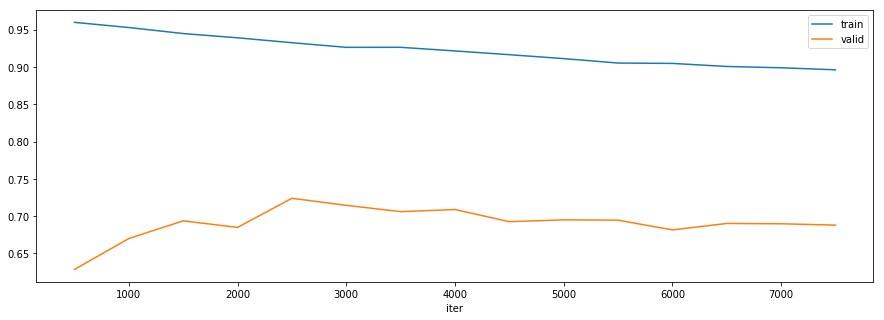

In [81]:
plot_df.groupby('set')['SVC'].plot(legend=True)

In [82]:
plot_df.groupby('set')['KNeighborsClassifier'].plot(legend=True)

KeyError: 'Column not found: KNeighborsClassifier'

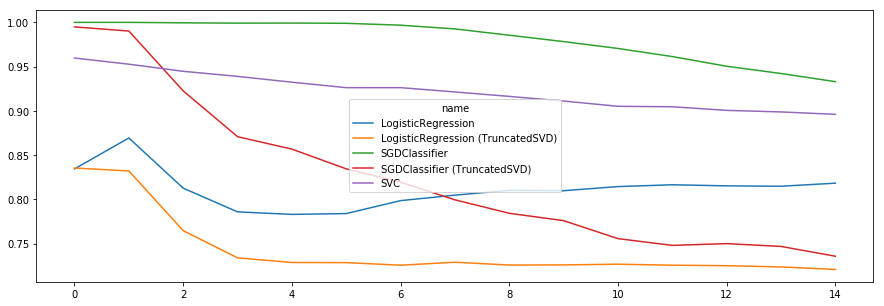

In [83]:
plt.rcParams["figure.figsize"] = (15,5)
train.iloc[:,1:].plot()

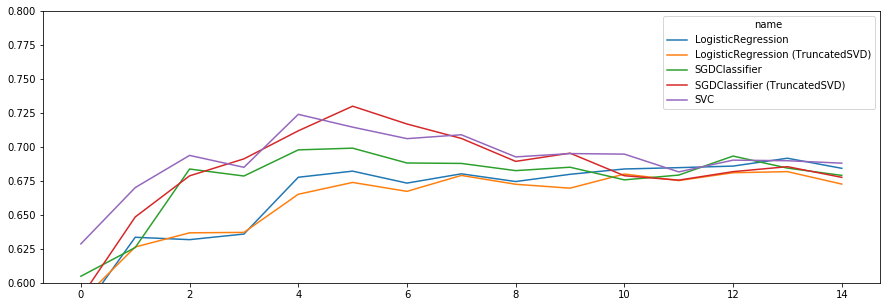

In [84]:
valid.iloc[:,1:].plot(ylim=(0.6, .8))